In [1]:
import sys
sys.executable

'C:\\Users\\amar\\anaconda3\\python.exe'

# Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.impute import KNNImputer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score


from scipy.stats import shapiro, kstest, normaltest


import warnings
warnings.filterwarnings("ignore")

# Problem Statment:

In [3]:
df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.shape

(8128, 13)

In [6]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df.isna().values.sum()

1100

In [8]:
df1 = df.copy()

# Feature Engineering 

In [9]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### 1. km_driven

In [10]:
def get_kms(x):
    if isinstance(x, float):
        return x
    else:
        kms = x.split()[0]
        return float(kms)

In [11]:
df1["mileage"] = df1["mileage"].apply(get_kms)

In [12]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### 2. engine

In [13]:
def get_engine_cc(x):
    if isinstance(x, float):
        return x
    else:
        cc = x.split()[0]
        return float(cc)

In [14]:
df1["engine"] = df1["engine"].apply(get_engine_cc)

In [15]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### 3. max_power

In [16]:
def get_power(x):
    if isinstance(x, float):
        return x
    else:
        result = x.split()[0]
        return result

In [17]:
df1["max_power"] = df1["max_power"].apply(get_power)

In [18]:
df1[df1["max_power"] == "bhp"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,bhp,NaN,8.0


In [19]:
df1.drop([4933], axis=0, inplace=True)

In [20]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


### 4. torque

In [21]:
def get_torue(j):
    if isinstance(j, float):
        return j
    else:
        if "kgm" in j and not ("Nm" in j):
            result = float(re.findall("[\d.]{2,8}", j)[0])
            return result*9.8
        if ("kgm" in j) and ("Nm" in j):
            result = float(re.findall("[\d.]{2,8}", j)[0])
            return result
        else:
            result = float(re.findall("\d{2,8}", j)[0])
            return result

In [22]:
df1["torque"] = df1["torque"].apply(get_torue)

In [23]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,124.46,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,219.52,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,112.70,5.0


In [24]:
df1["owner"].value_counts()

First Owner             5289
Second Owner            2104
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

## 5. owner

In [25]:
df1["owner"] = df1["owner"].replace({"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4, "Test Drive Car":0})

In [26]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250.00,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78,124.46,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90,219.52,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2,112.70,5.0


### 6. years

In [27]:
def get_years(x):
    current_date = dt.datetime.now()
    inp_date = dt.datetime.strptime(x, "%Y")
    days = (current_date-inp_date).days/365
    return round(days)

In [28]:
df1["year"] = df1["year"].astype(str)

In [29]:
df1["year"] = df1["year"].apply(get_years)

In [30]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,9,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,9,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250.00,5.0
2,Honda City 2017-2020 EXi,17,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78,124.46,5.0
3,Hyundai i20 Sportz Diesel,13,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90,219.52,5.0
4,Maruti Swift VXI BSIII,16,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2,112.70,5.0


### 7. "transmission", "fuel", "seller_type"

In [31]:
df3 = pd.get_dummies(df1, columns=["transmission", "fuel", "seller_type"])
df3.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,transmission_Manual,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,9,450000,145500,1,23.40,1248.0,74,190.00,5.0,0,1,0,1,0,0,0,1,0
1,Skoda Rapid 1.5 TDI Ambition,9,370000,120000,2,21.14,1498.0,103.52,250.00,5.0,0,1,0,1,0,0,0,1,0
2,Honda City 2017-2020 EXi,17,158000,140000,3,17.70,1497.0,78,124.46,5.0,0,1,0,0,0,1,0,1,0
3,Hyundai i20 Sportz Diesel,13,225000,127000,1,23.00,1396.0,90,219.52,5.0,0,1,0,1,0,0,0,1,0
4,Maruti Swift VXI BSIII,16,130000,120000,1,16.10,1298.0,88.2,112.70,5.0,0,1,0,0,0,1,0,1,0


### 8. name

In [32]:
def get_brand_name(x):
    result = re.match("[A-z]{1,10}", x).group()
    return result

In [33]:
df3["name"] = df3["name"].apply(get_brand_name)

In [34]:
df3.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,transmission_Manual,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,9,450000,145500,1,23.40,1248.0,74,190.00,5.0,0,1,0,1,0,0,0,1,0
1,Skoda,9,370000,120000,2,21.14,1498.0,103.52,250.00,5.0,0,1,0,1,0,0,0,1,0
2,Honda,17,158000,140000,3,17.70,1497.0,78,124.46,5.0,0,1,0,0,0,1,0,1,0
3,Hyundai,13,225000,127000,1,23.00,1396.0,90,219.52,5.0,0,1,0,1,0,0,0,1,0
4,Maruti,16,130000,120000,1,16.10,1298.0,88.2,112.70,5.0,0,1,0,0,0,1,0,1,0


In [35]:
brand = pd.get_dummies(df3["name"])

In [36]:
df4 = pd.concat([df3, brand], axis=1, join="inner").drop("name", axis=1)

In [37]:
df4.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,9,450000,145500,1,23.40,1248.0,74,190.00,5.0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,370000,120000,2,21.14,1498.0,103.52,250.00,5.0,0,...,0,0,0,0,0,1,0,0,0,0
2,17,158000,140000,3,17.70,1497.0,78,124.46,5.0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,225000,127000,1,23.00,1396.0,90,219.52,5.0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,130000,120000,1,16.10,1298.0,88.2,112.70,5.0,0,...,0,0,0,0,0,0,0,0,0,0


## Outliers Handling

In [38]:
df4.isna().values.sum()

1099

In [39]:
knn_imputer = KNNImputer()
array = knn_imputer.fit_transform(df4)
df5 = pd.DataFrame(array, columns=df4.columns)
df5.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,9.0,450000.0,145500.0,1.0,23.40,1248.0,74.00,190.00,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,370000.0,120000.0,2.0,21.14,1498.0,103.52,250.00,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.0,158000.0,140000.0,3.0,17.70,1497.0,78.00,124.46,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,225000.0,127000.0,1.0,23.00,1396.0,90.00,219.52,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,130000.0,120000.0,1.0,16.10,1298.0,88.20,112.70,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df5.isnull().values.sum()

0

In [41]:
df7 = df5[~(df5["torque"] > 1000)]
df7.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,9.0,450000.0,145500.0,1.0,23.40,1248.0,74.00,190.00,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,370000.0,120000.0,2.0,21.14,1498.0,103.52,250.00,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.0,158000.0,140000.0,3.0,17.70,1497.0,78.00,124.46,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,225000.0,127000.0,1.0,23.00,1396.0,90.00,219.52,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,130000.0,120000.0,1.0,16.10,1298.0,88.20,112.70,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df7.to_csv("df7.csv", index=False, header=True)

In [42]:
df5.shape

(8127, 50)

In [43]:
df7.shape

(8103, 50)

# Model Training 

In [63]:
x = df7.drop(["selling_price"], axis=1)        
y = df7["selling_price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)


knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)


# Training
y_pred_train = knn_model.predict(x_train)
r2 = r2_score(y_train, y_pred_train)
r2_adj = 1-(1-r2)*(x_train.shape[0] - 1)/(x_train.shape[0]-x_train.shape[1]-1)

mae = mean_absolute_error(y_train, y_pred_train)
rmsr = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("r squared :", r2)
print("r squared adj:", r2_adj)
print("mae     :", mae)
print("rmse :", rmsr)

print("-"*30)

# Testing 
y_pred_test = knn_model.predict(x_test)
r2_test = r2_score(y_test, y_pred_test)
r2_adj_test = 1-(1-r2_test)*(x_test.shape[0] - 1)/(x_test.shape[0]-x_test.shape[1]-1)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmsr_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("r squared :", r2_test)
print("r squared adj:", r2_adj_test)
print("mae     :", mae_test)
print("rmse :", rmsr_test)

r squared : 0.8832253060688151
r squared adj: 0.8823356978594513
mae     : 127074.69885837704
rmse : 273697.8967520391
------------------------------
r squared : 0.8293942405580382
r squared adj: 0.8240729915366148
mae     : 163330.0092535472
rmse : 343150.58804569056


In [46]:
residuls = abs(y_train - y_pred_train)
# shpiro
_, pvalues = shapiro(residuls)
if pvalues > 0.05:
    print("Normally distrubuted")
else:
    print("Not Normally Distrubuted")

# kstest
_, pvalues = kstest(residuls, "norm")
if pvalues > 0.05:
    print("Normally distrubuted")
else:
    print("Not Normally Distrubuted")

# normaltest
_, pvalues = normaltest(residuls)
if pvalues > 0.05:
    print("Normally distrubuted")
else:
    print("Not Normally Distrubuted")
    



Not Normally Distrubuted
Not Normally Distrubuted
Not Normally Distrubuted


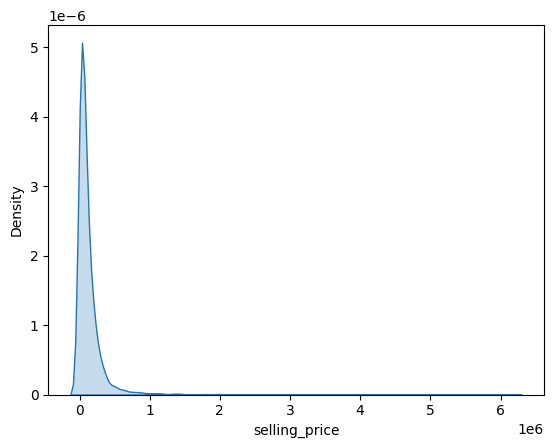

In [47]:
sns.kdeplot(residuls, fill=True)
plt.show()

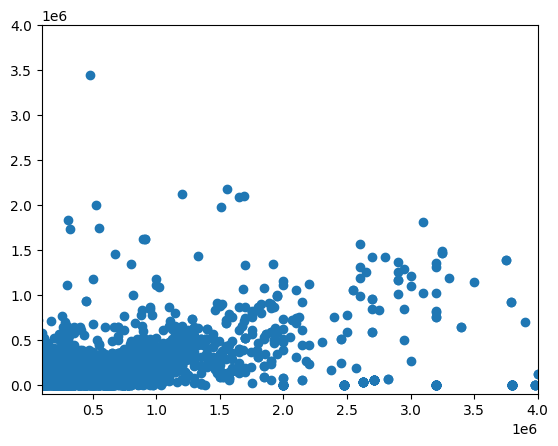

In [48]:
plt.scatter(x=y_train, y=residuls)
plt.xlim(100000, 4000000)
plt.ylim(-100000, 4000000)
plt.show()

# API Preperation

In [49]:
df7.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,9.0,450000.0,145500.0,1.0,23.40,1248.0,74.00,190.00,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,370000.0,120000.0,2.0,21.14,1498.0,103.52,250.00,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.0,158000.0,140000.0,3.0,17.70,1497.0,78.00,124.46,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,225000.0,127000.0,1.0,23.00,1396.0,90.00,219.52,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,130000.0,120000.0,1.0,16.10,1298.0,88.20,112.70,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df7.drop(["selling_price"], axis=1).columns

Index(['year', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'transmission_Automatic', 'transmission_Manual',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'Ambassador', 'Ashok', 'Audi', 'BMW',
       'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG',
       'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [51]:
owener_ = {"First":1, "Second":2, "Third":3,"Fourth":4, "Showroom":0}



In [52]:
owener = "First"
transmission = "Automatic"
fuel          = "CNG"
seller_type = "Dealer"
name = "Skoda"

In [53]:
columns = list(df7.drop(["selling_price"], axis=1).columns)

In [54]:
test_array = np.zeros(len(df7.drop(["selling_price"], axis=1).columns))

In [85]:
test_array[0] = 30        # year age of car
test_array[1] = 1000        # kms driven
test_array[2] =  owener_[owener]
test_array[3] =  23.40        #'mileage'
test_array[4] = 1000          #engine
test_array[5] = 74            #max_power
test_array[6] = 500        #torque
test_array[7] = 8          #seats

trans = 'transmission_' + transmission
idx = columns.index(trans)
test_array[idx] = 1

fu = 'fuel_' + fuel
idx_fuel = columns.index(fu)
test_array[idx_fuel] = 1


seller = 'seller_type_' + seller_type
idx_sell = columns.index(seller)
test_array[idx_sell] = 1

na =  name
idx_na = columns.index(na)
test_array[idx_na] = 1

In [89]:
df7.sample().drop("selling_price", axis=1).values

array([[6.000e+00, 5.000e+04, 1.000e+00, 2.430e+01, 1.248e+03, 8.850e+01,
        2.000e+02, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])

In [57]:
knn.predict([test_array])

array([827600.])

In [112]:
knn_model.predict(df7.sample().drop("selling_price", axis=1).values)

array([703999.8])

In [59]:
columns_data = {"owener": {"First":1, "Second":2, "Third":3,"Fourth":4, "Showroom":0}, 
                "columns":list(df7.drop(["selling_price"], axis=1).columns)}

In [60]:
import json
import pickle

In [71]:
df7.shape

(8103, 50)

In [78]:
x = df7.drop(["selling_price"], axis=1)        
y = df7["selling_price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)


knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [86]:
knn_model.predict([test_array])

array([511800.])

In [113]:
with open("knn_mode.pkl", "wb") as f:
    pickle.dump(knn_model, f)

In [ ]:
with open("json_data.json", "w") as f:
    json.dump(columns_data, f)

In [68]:
np.__version__

'1.21.4'

In [ ]:
np.array()